In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [20]:
with h5py.File("./Input_Discretized.jld2") as file:
    FaultCenter = np.array(file["FaultCenter"]).T

In [21]:
with h5py.File("./Input_ExternalStressChange.jld2") as file:
    # print(file.keys())
    ExternalStress_TimeArray = np.array(file["ExternalStress_TimeArray"])
    PorePressureChange = np.array( file["PorePressureChange"] ).T
    ExternalStress_Normal = np.array(file["ExternalStress_Normal"]).T
    # ExternalStress_Normal_Poro = np.array(file["ExternalStress_Normal_Poro"]).T
    ExternalStress_Shear = np.array(file["ExternalStress_Shear"]).T
    # ExternalStress_Shear_Poro = np.array(file["ExternalStress_Shear_Poro"]).T

In [22]:
Max_Time = ExternalStress_TimeArray[-1]
Year_in_Second = 365*24*3600 # 3e7

print("End Time in Year:", Max_Time/Year_in_Second)

End Time in Year: 0.136986301369863


Text(0, 0.5, 'Z (m)')

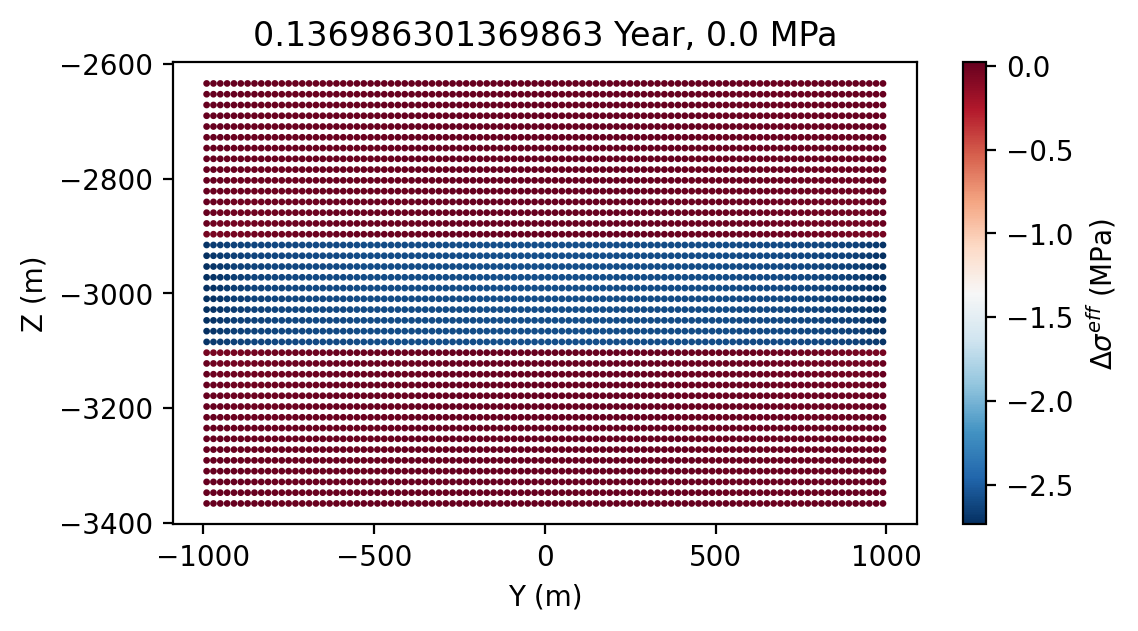

In [23]:
TimeStep = -1

fig = plt.figure(figsize=(6,3), dpi=200)
ax1 = fig.add_subplot(111)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2], s = 2.0, 
                  c = 1e-6*ExternalStress_Normal[TimeStep,:], cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label(r"$\Delta \sigma^{eff}$ (MPa)")
plt.title(f'{ExternalStress_TimeArray[TimeStep]/Year_in_Second} Year, {PorePressureChange[TimeStep,0]*1e-6} MPa');
plt.xlabel("Y (m)")
plt.ylabel("Z (m)")
# plt.savefig("image3.png")

Text(0, 0.5, 'Z (m)')

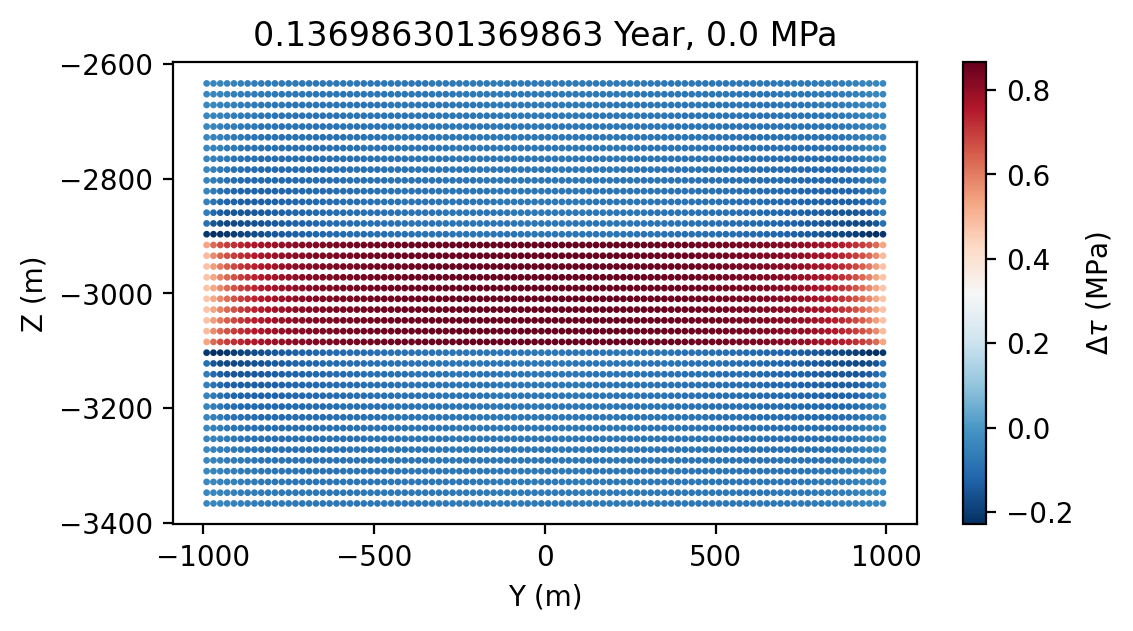

In [24]:
TimeStep = -1

fig = plt.figure(figsize=(6,3), dpi=200)
ax1 = fig.add_subplot(111)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2],  s = 2.0, 
                  c = 1e-6*ExternalStress_Shear[TimeStep,:], cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label(r"$\Delta \tau$ (MPa)")
plt.title(f'{ExternalStress_TimeArray[TimeStep]/Year_in_Second} Year, {PorePressureChange[TimeStep,0]*1e-6} MPa');
plt.xlabel("Y (m)")
plt.ylabel("Z (m)")
# plt.savefig("image4.png")


In [25]:
np.max(ExternalStress_Shear)*1e-6, np.min(ExternalStress_Shear)*1e-6

(0.8651954953143561, -0.22974582499252205)

In [26]:
np.max(ExternalStress_Normal)*1e-6, np.min(ExternalStress_Normal)*1e-6

(0.01938313872451123, -2.736659371765909)

In [27]:
idx_middle = np.argmin( np.linalg.norm(FaultCenter[:,(1,2)] - [0, 3920], axis=1) )
print( FaultCenter[idx_middle,:] )
print(ExternalStress_Shear[-1,idx_middle] * 1e-6)
print(ExternalStress_Normal[-1,idx_middle] * 1e-6)

[-133.3878559   -10.         3366.48012211]
-0.07362996716373643
0.01302452741029208
